# Question 1: 

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
* What metric would you report for this dataset?
* What is its value?


In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in the data
sneaker_shop = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")
sneaker_shop.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


In [3]:
#shape of the dataset
sneaker_shop.shape

(5000, 7)

### Data Exploration

In [4]:
#column datatypes
sneaker_shop.dtypes

order_id                 float64
shop_id                  float64
user_id                  float64
order_amount             float64
total_items              float64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [5]:
#check for null values
sneaker_shop.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [6]:
#check for duplicate values
sneaker_shop.duplicated().sum()

0

#### Section I: Checking the "total_items" column

In [7]:
#lets see what are the unique number of items for each order
sneaker_shop["total_items"].value_counts()

2.0       1832
1.0       1830
3.0        941
4.0        293
5.0         77
2000.0      17
6.0          9
8.0          1
Name: total_items, dtype: int64

From above, we see that orders at the shops are usually between 1-10 in the 30 day window except some stores whose orders are 2000. Lets see which stores have orders of 2000. 

In [8]:
#find shop_ids for shops that have orders of 2000
sneaker_shop[sneaker_shop["total_items"]==2000]["shop_id"].unique()


array([42.])

In [9]:
#Only shop 42 has orders of 2000. Lets check the others orders from shop 42.

In [10]:
sneaker_shop[sneaker_shop["shop_id"]==42.0]["total_items"].value_counts()

2000.0    17
1.0       15
2.0       13
3.0        3
4.0        2
5.0        1
Name: total_items, dtype: int64

In [11]:
shop_42 = sneaker_shop[sneaker_shop["shop_id"]==42.0]
shop_42.shape

(51, 7)

In [12]:
shop_42["AOV"] = shop_42["order_amount"]/shop_42["total_items"]
shop_42 = shop_42.sort_values(by = ["AOV"],ascending = False)
shop_42["AOV"].value_counts()

/var/folders/49/2zvl04l11_s5vlbf8vnfy7cw0000gn/T/ipykernel_26071/1609113107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_42["AOV"] = shop_42["order_amount"]/shop_42["total_items"]


352.0    51
Name: AOV, dtype: int64

Average value per order for shop 42 is 352. There does not seem to be any anomaly. 

### Section II: Average Order Value (AOV)

In [13]:
#summary statistics for orde_amount and total_items
sneaker_shop[["order_amount", "total_items"]].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


The original calculation for AOV (given in problem statement) seems to have just taken the mean (3145.13) of the order_amount without taking into account total_items ordered. 

The standard deviation and max value is also very high indicating there are some outliers. 

In [14]:
#drop unwanted columns
sneakers = sneaker_shop.drop(columns = ["order_id", "user_id", "payment_method", "created_at"])
print(sneakers.shape)
sneakers.head()

(5000, 3)


,shop_id,order_amount,total_items
0,53.0,224.0,2.0
1,92.0,90.0,1.0
2,44.0,144.0,1.0
3,18.0,156.0,1.0
4,18.0,156.0,1.0


In [15]:
#Calculate Average Order Value for each order and add a AOV column to the dataframe. 

sneakers["AOV"] = sneakers["order_amount"]/sneakers["total_items"]
sneakers = sneakers.sort_values(by = ["AOV"],ascending = False)
sneakers.head()

,shop_id,order_amount,total_items,AOV
4420,78.0,77175.0,3.0,25725.0
2906,78.0,77175.0,3.0,25725.0
4505,78.0,25725.0,1.0,25725.0
493,78.0,51450.0,2.0,25725.0
2452,78.0,51450.0,2.0,25725.0


In [16]:
#Lets see how many unique AOVs are there
print(f"No of unique AOVs in dataset : {sneakers['AOV'].nunique()}")
sneakers["AOV"].unique()

No of unique AOVs in dataset : 58


array([25725.,   352.,   201.,   196.,   195.,   193.,   190.,   187.,
         184.,   181.,   178.,   177.,   176.,   173.,   172.,   171.,
         169.,   168.,   166.,   165.,   164.,   163.,   162.,   161.,
         160.,   158.,   156.,   155.,   154.,   153.,   149.,   148.,
         147.,   146.,   145.,   144.,   142.,   140.,   138.,   136.,
         134.,   133.,   132.,   131.,   130.,   129.,   128.,   127.,
         122.,   118.,   117.,   116.,   114.,   112.,   111.,   101.,
          94.,    90.])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3dcd195e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3dcd19c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3dcd2d070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3dcd463a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3dcd46730>],
 'means': []}

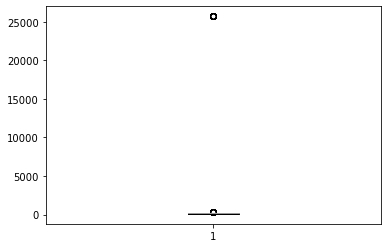

In [17]:
#boxplot to visually see the outliers
x=sneakers["AOV"]
plt.boxplot(x)

In [18]:
sneakers[sneakers["AOV"]==25725]["shop_id"].unique()

array([78.])

In [19]:
sneakers[sneakers["AOV"]==25725]["shop_id"].shape

(46,)

We can see there is one outlier with shop_id 78 with 46 orders with AOV of 25725 that is  substantially higher than the other data points. 

### Section III Mean and Median

Lets compare  scenarios where we calculate mean and median for AOV (Average Order Value) before and after removing the outlier 25725. 



##### Mean and Median AOV before removing the outlier

In [20]:
#calculate median AOV
sneakers["AOV"].median()

153.0

In [21]:
#calculate average AOV
sneakers["AOV"].mean()


387.7428

We can that mean(387.74) and median (153.0) are far apart. More specifically Mean is more than $200 over the median and closer to the 75th percentile (390.0) from our summary statistics calculation. 

Now lets see what happens when we remove the outlier data and calculate mean and median again. 

##### Mean and Median AOV after removing the outlier 

In [22]:
#drop rows which have AOV = 25725
sneakers_drop78= sneakers[sneakers.AOV != 25725]
print(f"The shape of the dataset is :{sneakers_drop78.shape}")
sneakers_drop78.head()

The shape of the dataset is :(4954, 4)


,shop_id,order_amount,total_items,AOV
3697,42.0,352.0,1.0,352.0
1929,42.0,352.0,1.0,352.0
1911,42.0,704.0,2.0,352.0
308,42.0,352.0,1.0,352.0
2987,42.0,1056.0,3.0,352.0


In [23]:
sneakers_drop78["AOV"].median()

153.0

In [24]:
sneakers_drop78["AOV"].mean()

152.47557529269278

The median remains the same at 153.0 and mean (152.48) is now closer to the median meaning the data set now has a symmetrical distribution. 

# Conclusion 


In this dataset, we observed that the mean and median far apart when outliers are not removed. More specifically Mean is more than \\$200 over the median. From furthur observation of the dataset, that shop_id 78 has several orders with an  AOV of \\$25725 which does not agree with the characterization of affordable shoes in the description. We note that the larger mean is a direct result of this outlier. 

To prove this hypothesis, we prune the outliers from the dataset and recompute the mean. Such a recomputed mean is closer to the median,  which proves the hypothesis. 

For the highlighted reason Median is a better measure of AOV than mean for this dataset. 